In [1]:
require(data.table)
require(ggplot2)
require(ggExtra)
require(magrittr)

Loading required package: data.table

Loading required package: ggplot2

Loading required package: ggExtra

Loading required package: magrittr



In [30]:
options(repr.plot.width=15, repr.plot.height=15)

In [32]:
rollbacks <- fread("rollbacks.csv")
rollbacks %>% summary

     Boost              Seed          At Slot           Blocks     
 Min.   :0.00000   Min.   :  283   Min.   :  0.00   Min.   :1.000  
 1st Qu.:0.02400   1st Qu.: 7074   1st Qu.:  8.00   1st Qu.:1.000  
 Median :0.05100   Median :15967   Median : 33.00   Median :1.000  
 Mean   :0.05006   Mean   :15452   Mean   : 38.38   Mean   :1.032  
 3rd Qu.:0.07400   3rd Qu.:23308   3rd Qu.: 58.00   3rd Qu.:1.000  
 Max.   :0.10000   Max.   :32568   Max.   :115.00   Max.   :3.000  
     Slots         From Weight       To Weight    
 Min.   : 1.000   Min.   : 1.000   Min.   : 2.00  
 1st Qu.: 2.000   1st Qu.: 3.000   1st Qu.: 4.34  
 Median : 3.000   Median : 9.089   Median :10.09  
 Mean   : 4.611   Mean   :10.594   Mean   :11.58  
 3rd Qu.: 6.000   3rd Qu.:15.500   3rd Qu.:16.50  
 Max.   :25.000   Max.   :34.557   Max.   :35.56  

In [33]:
rollbacks %>% head

Boost,Seed,At Slot,Blocks,Slots,From Weight,To Weight
<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
0,31001,10,1,6,3,4
0,31001,10,1,6,3,4
0,31001,8,1,3,2,3
0,31001,8,1,3,2,3
0,31001,10,1,6,3,4
0,31001,10,1,6,3,4


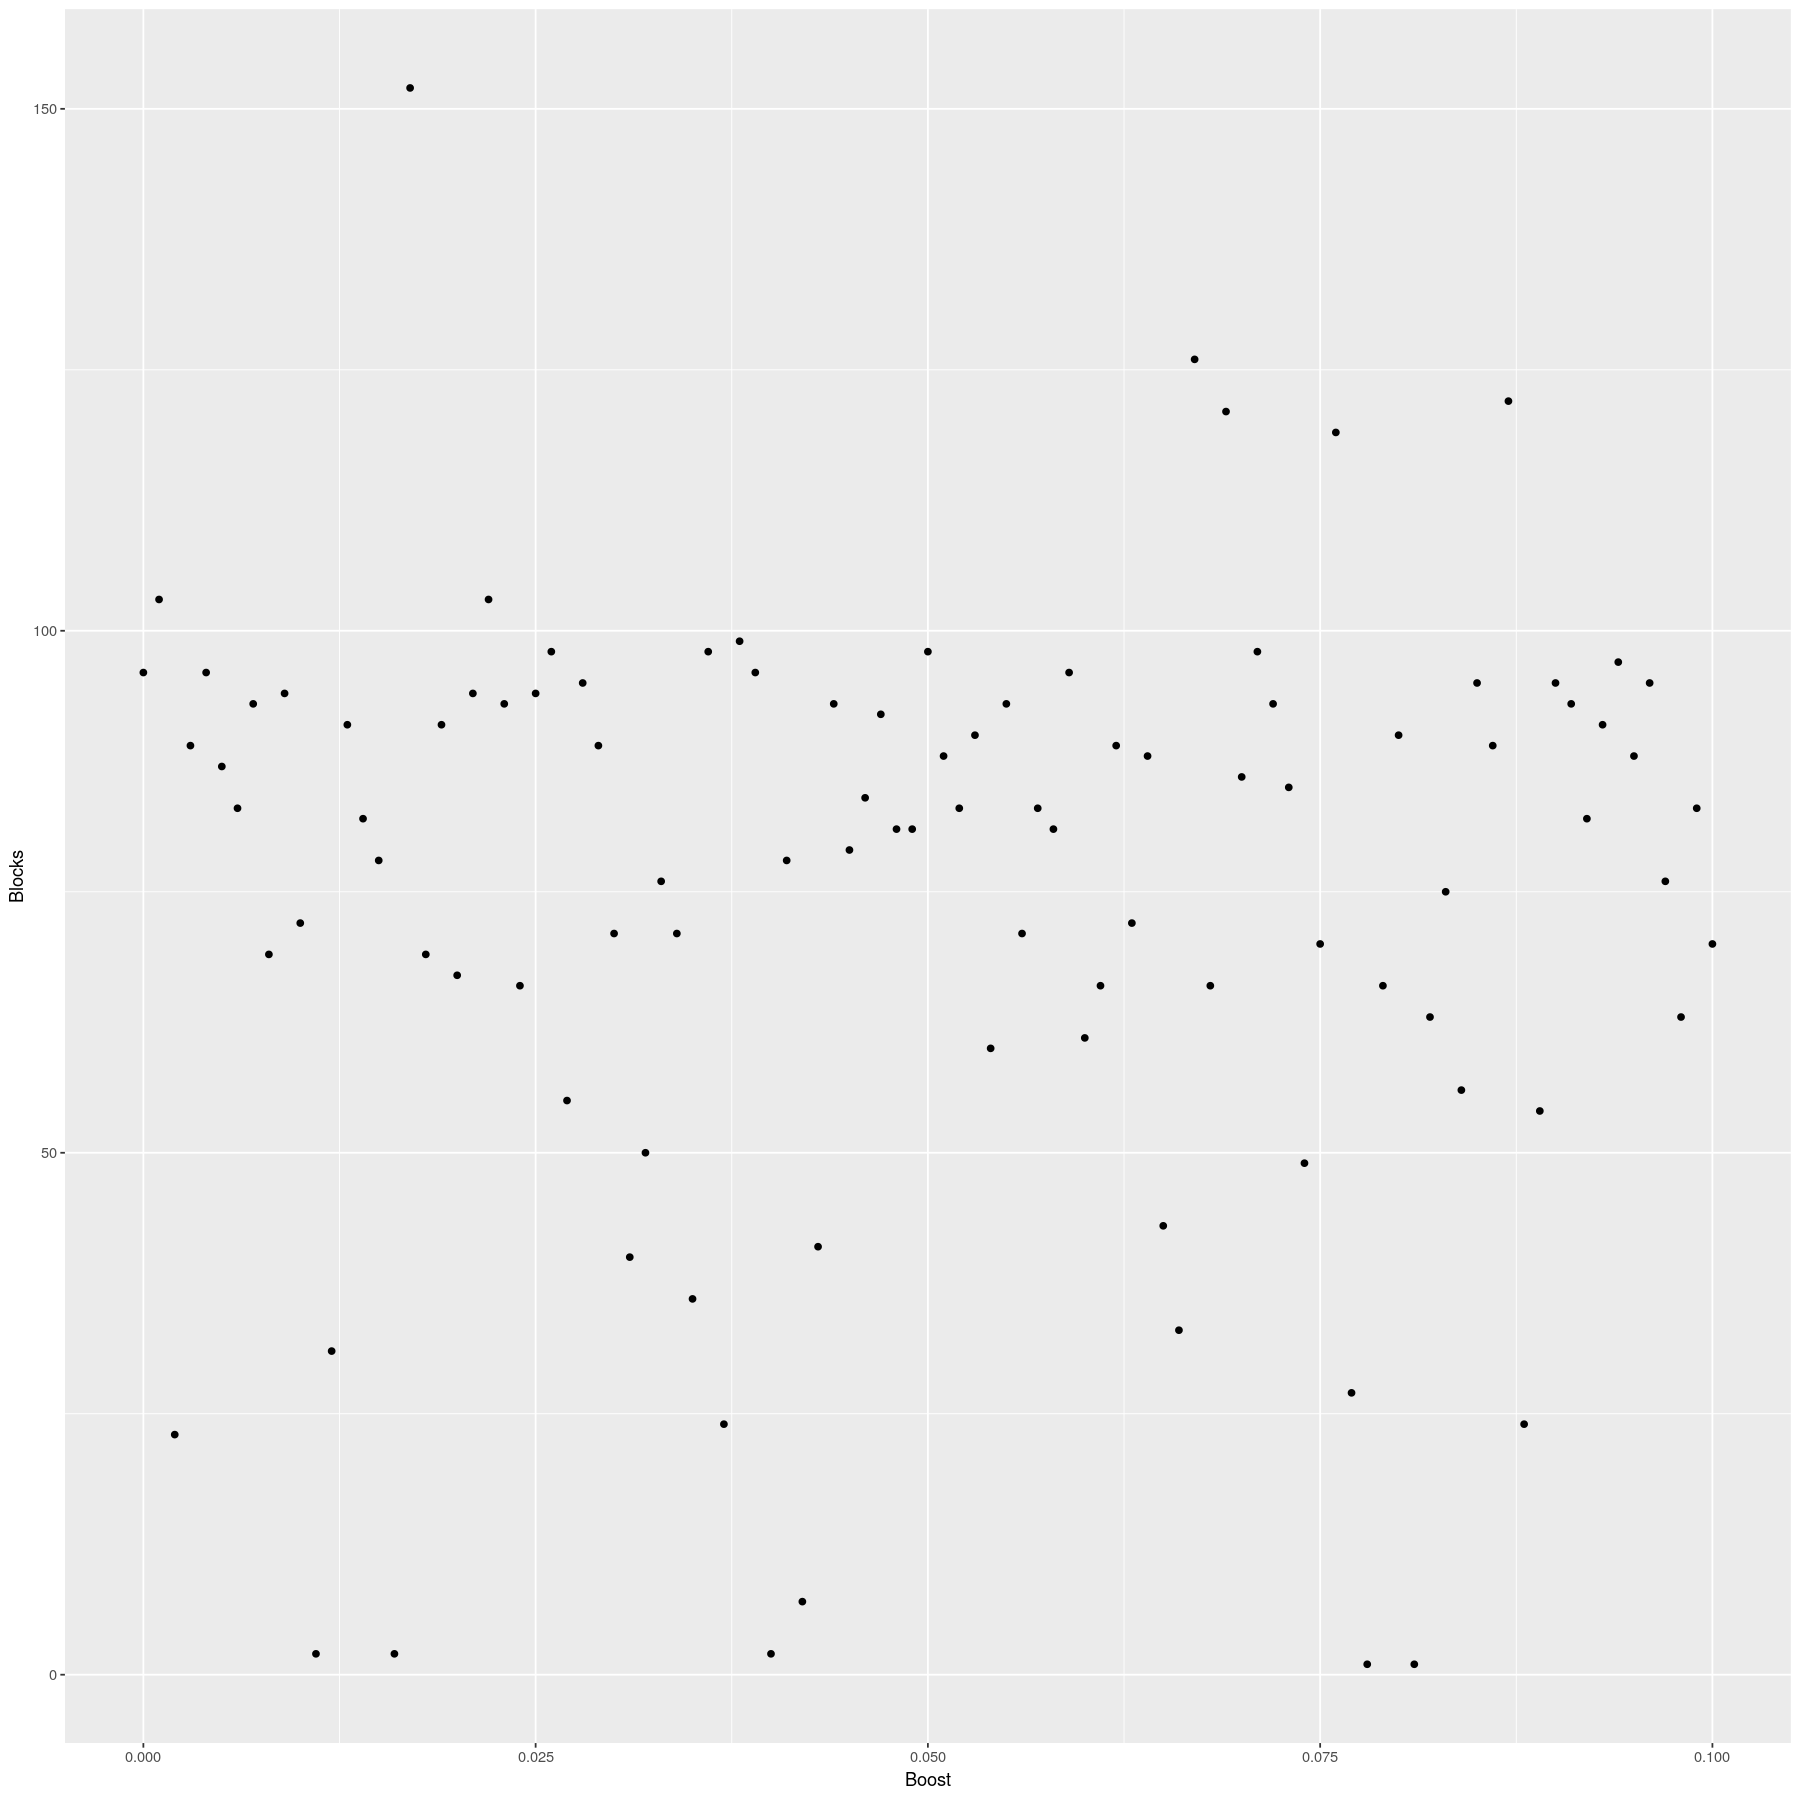

In [34]:
ggplot(rollbacks[, .(Blocks=sum(Blocks), Slots=sum(Slots)), by=.(Boost)], aes(x=Boost, y=Blocks)) +
  geom_point()

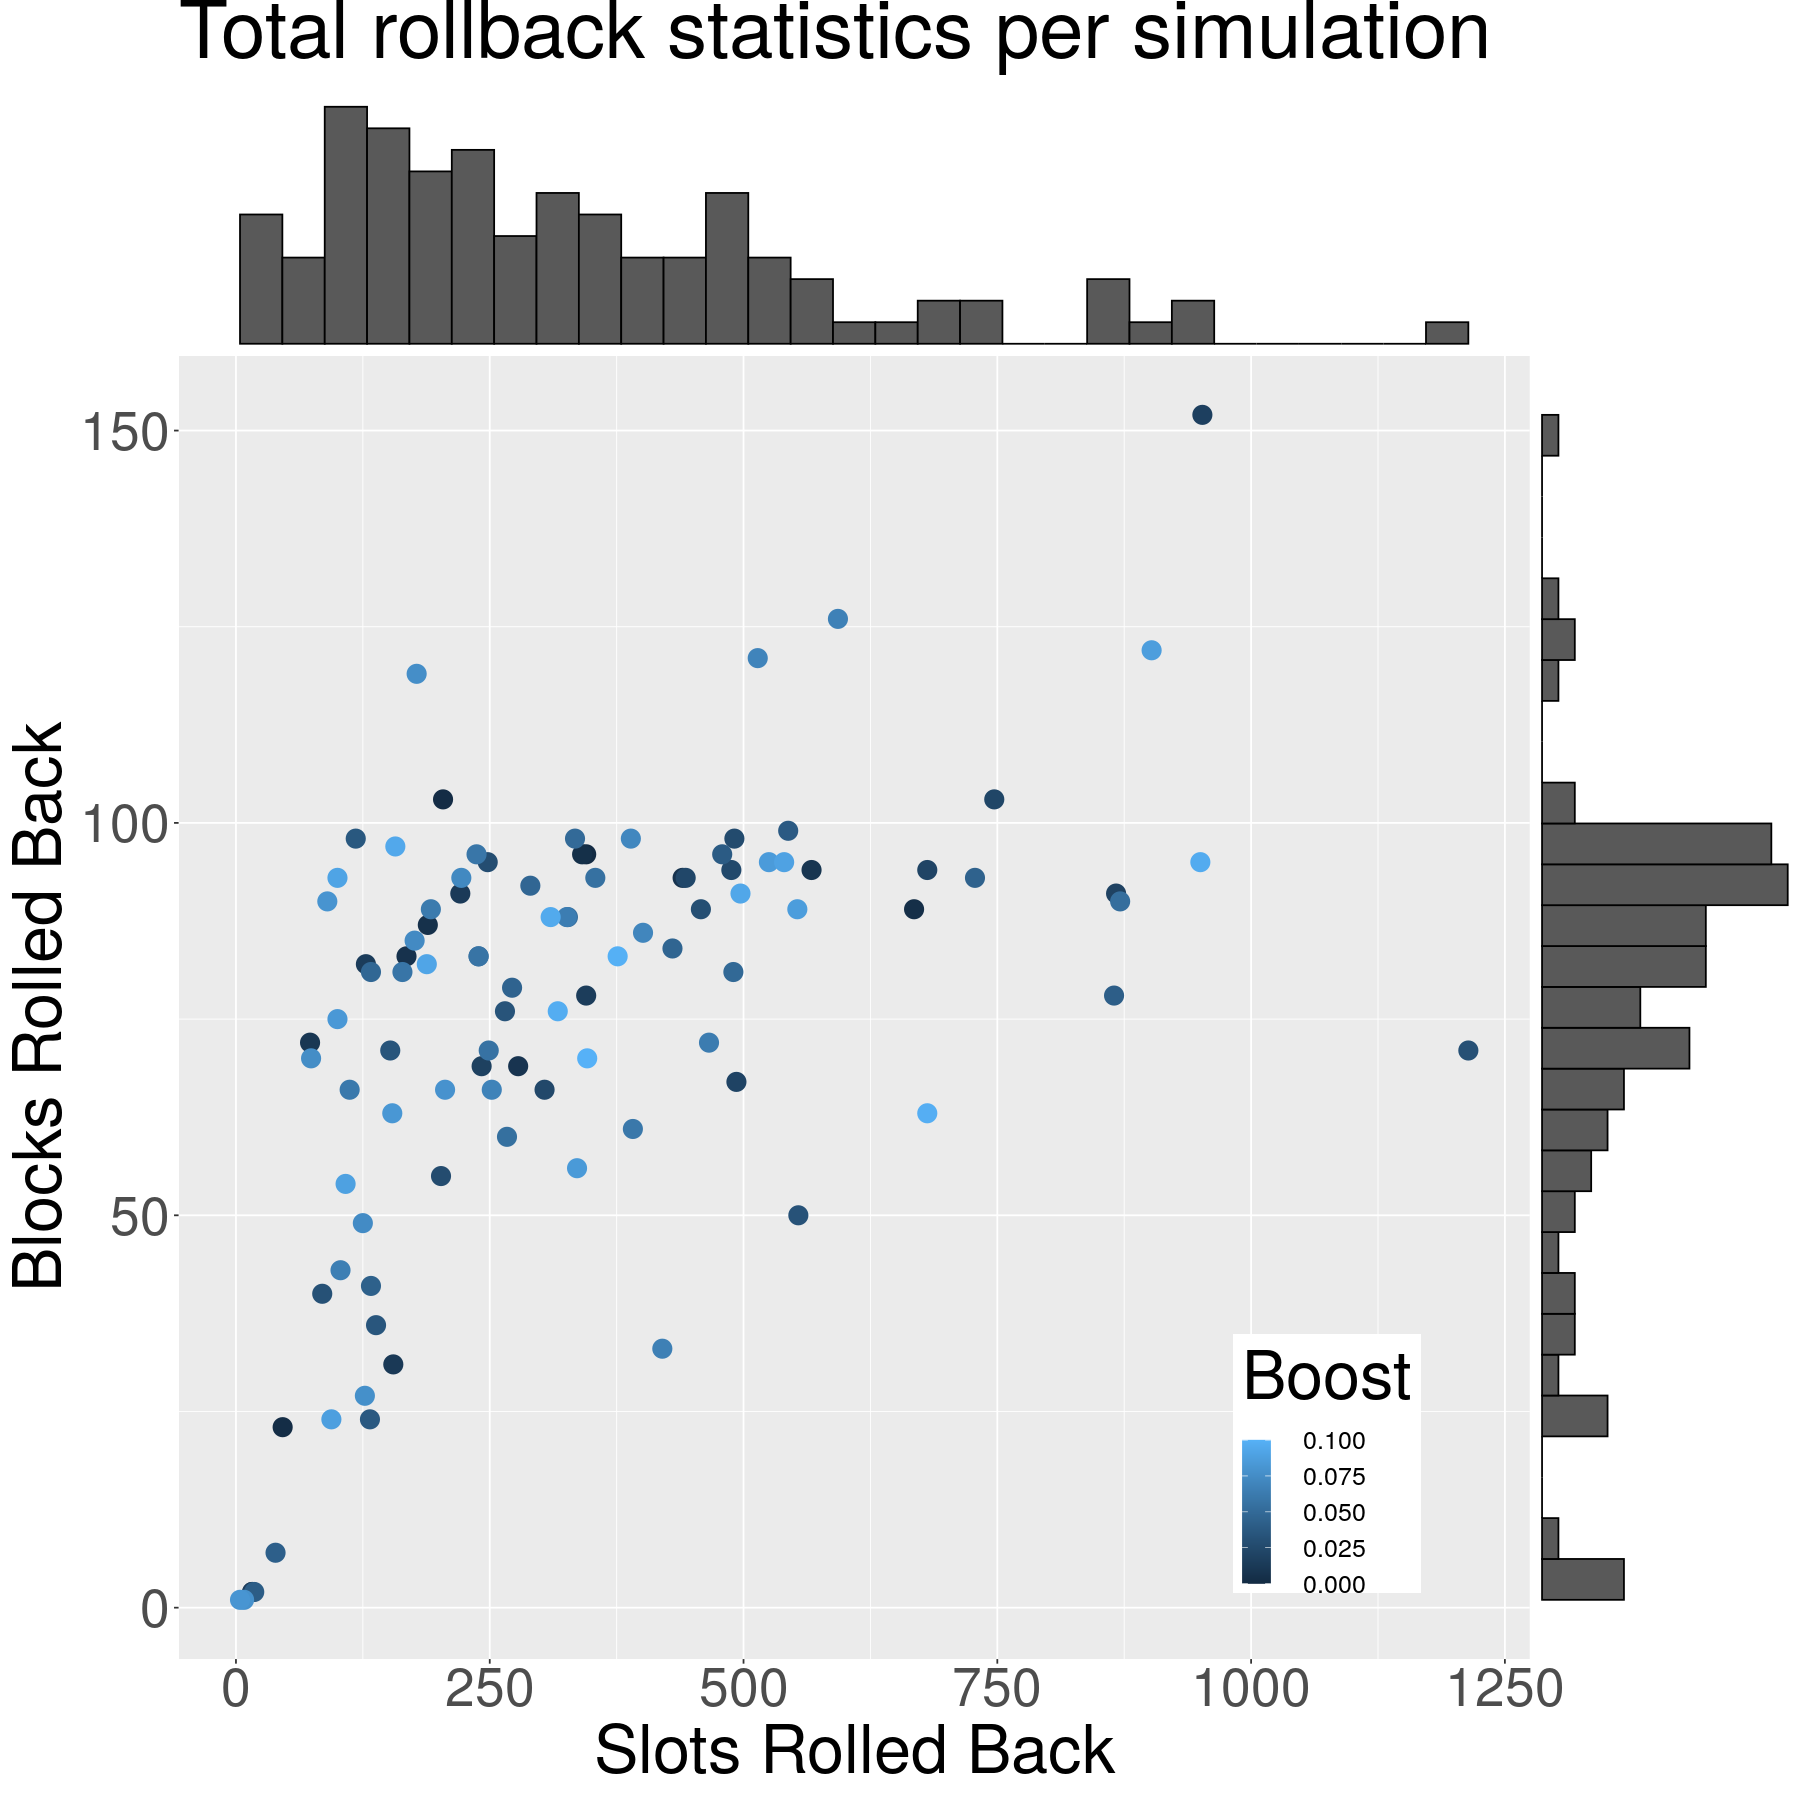

In [41]:
g <- ggplot(
    rollbacks[, .(`Blocks Rolled Back`=sum(Blocks), `Slots Rolled Back`=sum(Slots)), by=.(Boost)],
    aes(x=`Slots Rolled Back`, y=`Blocks Rolled Back`, color=Boost)
) +
  geom_point(size=5) +
  theme(legend.position = c(0.85, 0.15), text = element_text(size = 40), legend.text = element_text(size = 15)) +
  ggtitle("Total rollback statistics per simulation")
ggMarginal(g, type="histogram")